# Описание задания:

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
stud_math = pd.read_csv('stud_math.csv')
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Описание переменных

1.  school — аббревиатура школы, в которой учится ученик
2.  sex — пол ученика ('F' - женский, 'M' - мужской)
3.  age — возраст ученика (от 15 до 22)
4.  address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

In [3]:
stud_math['studytime, granular']

0     -6.0
1     -6.0
2     -6.0
3     -9.0
4     -6.0
      ... 
390   -6.0
391   -3.0
392   -3.0
393   -3.0
394   -3.0
Name: studytime, granular, Length: 395, dtype: float64

In [4]:
stud_math.studytime

0      2.0
1      2.0
2      2.0
3      3.0
4      2.0
      ... 
390    2.0
391    1.0
392    1.0
393    1.0
394    1.0
Name: studytime, Length: 395, dtype: float64

<AxesSubplot:title={'center':'Время на учебу вне школы'}, xlabel='studytime, granular', ylabel='studytime'>

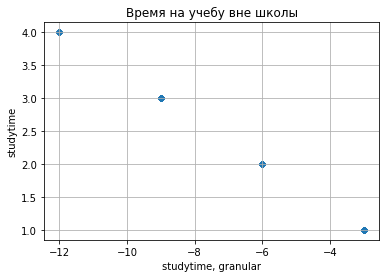

In [5]:
stud_math.plot(x = 'studytime, granular', 
        y = 'studytime', 
        kind = 'scatter', 
        grid = True, 
        title = 'Время на учебу вне школы')

In [125]:
stud_math.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

# Столбцы $studytime, granular$ и $studytime$ есть ни что иное как одно и тоже, поэтому удаляем из рассмотрение первый столбец

In [26]:
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)
list_stud = stud_math.columns.to_list()
list_stud

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

In [4]:
def chek_value_counts(column):
    a = str(stud_math[column].dtype)
    if a=='object':
        stud_math[column] = stud_math[column].apply(lambda x: str(x).replace('NaN', ''))
    else:
        stud_math[column] =  stud_math[column].apply(lambda x: float(str(x).replace('NaN', '')))
    if 'nan' in stud_math[column].value_counts().index:
        print(column,'nan',round(stud_math[column].value_counts()['nan']*100/395.0,1),"%")


In [8]:
for i in list_stud:
    chek_value_counts(i)

address nan 4.3 %
famsize nan 6.8 %
Pstatus nan 11.4 %
Mjob nan 4.8 %
Fjob nan 9.1 %
reason nan 4.3 %
guardian nan 7.8 %
schoolsup nan 2.3 %
famsup nan 9.9 %
paid nan 10.1 %
activities nan 3.5 %
nursery nan 4.1 %
higher nan 5.1 %
internet nan 8.6 %
romantic nan 7.8 %


# Пропусков по столбцу не более 10% от общего числа(395)
# Так как пропуски разбросаны произвольно по данным, то их удаление приведет к полной потери всех данных. Будем заменять на некоторые значения. Отметим , что пропуски содержат ТОЛЬКО категориальные данные (не числовые)

In [19]:
for i in list_stud:
    print(i,stud_math[i].value_counts().index.to_list())

school ['GP', 'MS']
sex ['F', 'M']
age [16.0, 17.0, 15.0, 18.0, 19.0, 20.0, 21.0, 22.0]
address ['U', 'R']
famsize ['GT3', 'LE3', 'nan']
Pstatus ['T', 'nan', 'A']
Medu [4.0, 2.0, 3.0, 1.0, 0.0]
Fedu [2.0, 3.0, 4.0, 1.0, 0.0, 40.0]
Mjob ['other', 'services', 'at_home', 'teacher', 'health', 'nan']
Fjob ['other', 'services', 'nan', 'teacher', 'at_home', 'health']
reason ['course', 'home', 'reputation', 'other', 'nan']
guardian ['mother', 'father', 'nan', 'other']
traveltime [1.0, 2.0, 3.0, 4.0]
studytime [2.0, 1.0, 3.0, 4.0]
failures [0.0, 1.0, 2.0, 3.0]
schoolsup ['no', 'yes', 'nan']
famsup ['yes', 'no', 'nan']
paid ['no', 'yes', 'nan']
activities ['yes', 'no', 'nan']
nursery ['yes', 'no', 'nan']
higher ['yes', 'nan', 'no']
internet ['yes', 'no', 'nan']
romantic ['no', 'yes', 'nan']
famrel [4.0, 5.0, 3.0, 2.0, 1.0, -1.0]
freetime [3.0, 4.0, 2.0, 5.0, 1.0]
goout [3.0, 2.0, 4.0, 5.0, 1.0]
health [5.0, 3.0, 4.0, 1.0, 2.0]
absences [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 3.0, 16.0, 7.0, 

# Воспользуемся модой для тех не числовых данных где стоит выбор "да" или "нет"

In [10]:
stud_math.address.value_counts()

U      295
R       83
nan     17
Name: address, dtype: int64

In [5]:
stud_math.address = stud_math.address.apply(lambda x: stud_math.address.value_counts().index[0] if x == 'nan' else x)

In [12]:
stud_math.address.value_counts()

U    312
R     83
Name: address, dtype: int64

Из приведенных выше данных видно, что параметр yes и no в некоторых одного порядка, поэтому в этом случае мы не можем однозначно заменить nan на моду. Поэтому сделаем так: Если мода занимает 70% всех бинарных данных, то мы заменяем nan на моду. Что делать с остальными посмотрим дальше на графиках.

In [6]:
for i in ['famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    #print(i,stud_math[i].value_counts(),stud_math[i].value_counts()[1]/stud_math[i].value_counts()[0],'от мах')
    a = stud_math[i].value_counts()[1]/stud_math[i].value_counts()[0]
    if a < 0.3:
        stud_math[i] = stud_math[i].apply(lambda x: stud_math[i].value_counts().index[0] if x == 'nan' else x)
    else:
        print(i,'min составляет ',a,'от мах')
       # print(stud_math[i].value_counts())

famsize min составляет  0.4099616858237548 от мах
famsup min составляет  0.6255707762557078 от мах
paid min составляет  0.775 от мах
activities min составляет  0.9538461538461539 от мах
romantic min составляет  0.5166666666666667 от мах


# параметр activities дополнительные внеучебные занятия имеют распределение 50%50, поэтому вклад в анализ они должны дать одинаковый, поэтому логичнее удалить эти выбросы

In [33]:
stud_math.activities.value_counts()

yes    195
no     186
nan     14
Name: activities, dtype: int64

In [7]:
stud_math.activities = stud_math.activities.apply(lambda x: None if x == 'nan' else x)
stud_math.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [40]:
for i in ['famsize','famsup','paid','romantic']:
    print(stud_math[i].value_counts())
# 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
# 17 famsup — семейная образовательная поддержка (yes или no)
# 18 paid — дополнительные платные занятия по математике (yes или no)
# 23 romantic — в романтических отношениях (yes или no)

GT3    261
LE3    107
nan     27
Name: famsize, dtype: int64
yes    219
no     137
nan     39
Name: famsup, dtype: int64
no     200
yes    155
nan     40
Name: paid, dtype: int64
no     240
yes    124
nan     31
Name: romantic, dtype: int64


Пусть nan также равны моде

In [8]:
for i in ['famsize','famsup','paid','romantic']:
    stud_math[i] = stud_math[i].apply(lambda x: stud_math[i].value_counts().index[0] if x == 'nan' else x)


# Рассмотрим теперь категориальные данные в которых больше 2-х вариантов: 
1. Mjob  работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
2. Fjob работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
3. reason причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
4. guardian  опекун ('mother' - мать, 'father' - отец, 'other' - другое)

Судя по описанию(и по построению) большая часть данных относиться к other. Потому, логичнее все nan отнести к этой категории

In [9]:
stud_math.Mjob = stud_math.Mjob.apply(lambda x: 'other' if x == 'nan' else x)
stud_math.Fjob = stud_math.Fjob.apply(lambda x: 'other' if x == 'nan' else x)
stud_math.reason = stud_math.reason.apply(lambda x: 'other' if x == 'nan' else x)
stud_math.guardian = stud_math.guardian.apply(lambda x: 'other' if x == 'nan' else x)

# Рассмотрим числовые данные. Так  как они не содержат пропусков, то проверим на адекватность значений(в широком смысле)

In [10]:
# age [16.0, 17.0, 15.0, 18.0, 19.0, 20.0, 21.0, 22.0]
# Medu [4.0, 2.0, 3.0, 1.0, 0.0]
# Fedu [2.0, 3.0, 4.0, 1.0, 0.0, 40.0]
# traveltime [1.0, 2.0, 3.0, 4.0]
# studytime [2.0, 1.0, 3.0, 4.0]
# failures [0.0, 1.0, 2.0, 3.0]
# famrel [4.0, 5.0, 3.0, 2.0, 1.0, -1.0]
# freetime [3.0, 4.0, 2.0, 5.0, 1.0]
# goout [3.0, 2.0, 4.0, 5.0, 1.0]
# health [5.0, 3.0, 4.0, 1.0, 2.0]
# absences [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 3.0, 16.0, 7.0, 5.0, 18.0, 20.0, 22.0, 9.0, 1.0, 15.0, 13.0, 11.0, 25.0, 54.0, 385.0, 26.0, 56.0, 24.0, 212.0, 21.0, 75.0, 30.0, 19.0, 38.0, 40.0, 23.0, 17.0, 28.0]
# score [50.0, 55.0, 0.0, 75.0, 65.0, 40.0, 60.0, 70.0, 45.0, 80.0, 30.0, 90.0, 35.0, 25.0, 85.0, 95.0, 100.0, 20.0]
list_val=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','absences','score']
# 3 age — возраст ученика (от 15 до 22)
# 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
# 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# 28 absences — количество пропущенных занятий
# 29 score — баллы по госэкзамену по математи


# Параметр FEDU имеет значение 40, видимо опечатка. Посмотрим сколько таких значений

In [81]:
stud_math.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

# Такое значение единственно. Можем удалить, а можем подумать, что вместе 4 записали 40. Воспользуемся вторым вариантом

In [11]:
stud_math.Fedu = stud_math.Fedu.apply(lambda x: 4 if x == 40 else x)

# Посмотрим также отдельно на параметр famrel

In [84]:
stud_math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

### Также видим присутсвует одно отрицательное значение: либо удаляем, либо при записи вместо +1 было написано -1. Воспользуемся вторым способом, поскольку как и в первом случае добавления одно наблюдения на выборку не влияет(данный параметр либо самый большой среди всех либо самый маленький как для этого параметра)

In [12]:
stud_math.famrel = stud_math.famrel.apply(lambda x: 1.0 if x == -1.0 else x)

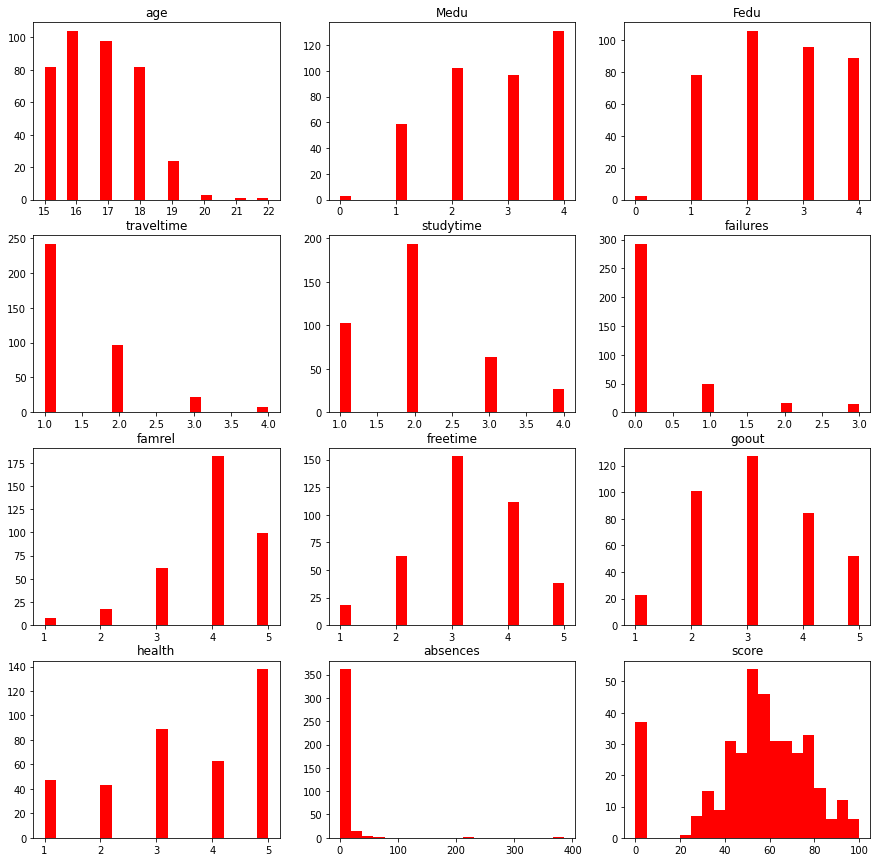

In [13]:
fig, axes = plt.subplots(4,3,figsize=(15,15))
count=0
for i in list_val:
    axes[count//3][count - (count//3)*3].hist(stud_math[i], color='red',bins=20)
    axes[count//3][count - (count//3)*3].set_title(i)
    count+=1

### Так как диапоз распределения числовых параметров очень мал, то считать интерквартальный размах не имеет смысла. Однако стоить обратить внимание на параметр посещения занятий absences. 

In [89]:
stud_math.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

# Удалим из столбца score тех учеников которые не набрали вообще баллов. То есть не пришли на экзамен.

In [33]:
stud_math.score.value_counts()

50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

In [34]:
stud_math.score = stud_math.score.apply(lambda x: None if x == 0 else x)

In [35]:
stud_math.score.value_counts()

50.0     53
55.0     42
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

### Есть два ученика которые  не посещали  занятий (возможно болел или прогуливал). Однако если посмотреть на гистограмму здоровья, то тех кто болеет(или в плохом состоянии..всегда повышенная температура) явно больше 2-х, поэтому корреляции не должно быть. Поэтому удаляем этих учеников из рассмотрения данных

In [36]:
stud_math.absences = stud_math.absences.apply(lambda x: None if x > 200 else x)

<AxesSubplot:ylabel='Frequency'>

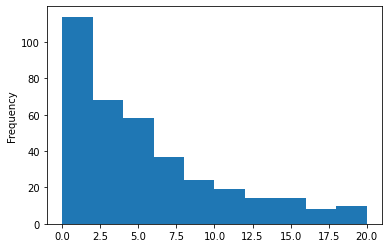

In [37]:
stud_math.absences.plot(kind='hist')

In [38]:
stud_math.absences.median()

4.0

In [39]:
stud_math.absences.mean()

4.603825136612022

### Реальных прогульщиков мало. Чтобы оценить вклад корреляцию сделаем в два этапа: полная выборка и выборка в пределах интерквартального размаха

<AxesSubplot:title={'center':'полная корреляция с данными пропусков занятий'}, xlabel='absences', ylabel='score'>

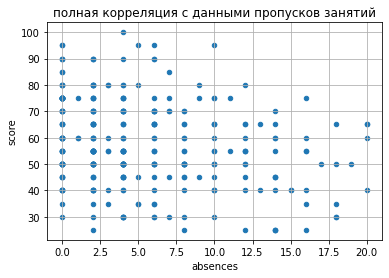

In [40]:
stud_math.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True, 
        title = 'полная корреляция с данными пропусков занятий')

# Видим отсутсвие корреляции между оценкой и количеством пропусков. Наверное всетаки связь должна быть. Оставим из всех данных только те которые попали в межквартальный размах

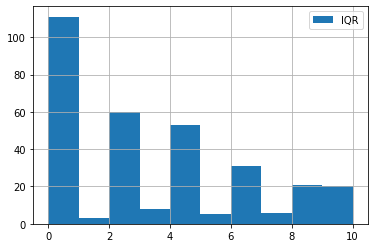

In [41]:
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
stud_math.absences.loc[stud_math.absences.between(0, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [42]:
stud_math = stud_math.loc[stud_math.absences.between(0, perc75 + 1.5*IQR)]

<AxesSubplot:title={'center':'IQR корреляция с данными пропусков занятий'}, xlabel='absences', ylabel='score'>

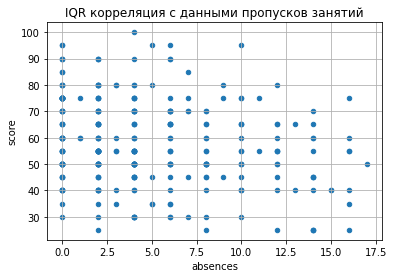

In [43]:
stud_math.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True, 
        title = 'IQR корреляция с данными пропусков занятий')

In [44]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.176166,-0.179298,0.079718,0.002361,0.188469,0.065932,0.053840,0.143414,-0.053499,0.133402,-0.139604
Medu,-0.176166,1.000000,0.624306,-0.188717,0.086941,-0.250007,-0.025040,0.037183,0.037888,-0.053162,0.114954,0.187063
Fedu,-0.179298,0.624306,1.000000,-0.144644,0.003325,-0.297688,-0.033484,-0.001098,0.006291,0.016886,-0.002491,0.133839
traveltime,0.079718,-0.188717,-0.144644,1.000000,-0.105570,0.085976,-0.017712,0.004449,0.040547,-0.003375,-0.059324,-0.081211
studytime,0.002361,0.086941,0.003325,-0.105570,1.000000,-0.178612,0.030730,-0.129574,-0.036383,-0.087433,-0.040679,0.143721
failures,0.188469,-0.250007,-0.297688,0.085976,-0.178612,1.000000,0.006975,0.099402,0.075147,0.090578,0.082480,-0.287503
famrel,0.065932,-0.025040,-0.033484,-0.017712,0.030730,0.006975,1.000000,0.185001,0.091114,0.085990,-0.084157,0.074065
freetime,0.053840,0.037183,-0.001098,0.004449,-0.129574,0.099402,0.185001,1.000000,0.299663,0.042757,0.089726,-0.010754
goout,0.143414,0.037888,0.006291,0.040547,-0.036383,0.075147,0.091114,0.299663,1.000000,-0.002303,0.143495,-0.200476
health,-0.053499,-0.053162,0.016886,-0.003375,-0.087433,0.090578,0.085990,0.042757,-0.002303,1.000000,-0.040024,-0.054884


Общий вывод: нет сколлерированных параметров(зависимых параметров), однако и связь параметров на итоговое значение score также мало. Наиболее значимые параметры это age(возраст, причем обратная корреляция),Medu(образование матери),образование отца в 2раза меньше, studytime (внеучебные занятия) и failures (неудачи)
Как мы видим параметры возраст и неудачи дают обратную связь, то есть занижают оценку score. Неудачи - чем больше было неудачь, тем меньше мотивация ученика и соотвесвенно его оценка на экзамене. Возраст дает в два раза меньший отклик, а интерпритация его в том, что чем старше человек, тем он ленивее ..вот и плохая оценка. На самом деле здесь эти два параметра имеют связь 0,19, однако эта связь не очень большая и поэтому можно оставить эти два параметра как независимые друг от друга.
Также есть параметр goout (проведение время с друзьями)
Параметр absences(пропуски занятий) - несмотря на то что графики показывают отсуствие линйной связи, корелляция незнаничельная но есть.
ПС По идее если коэффициент меньше 50% то для некоторых задач эти параметры не будут давать никакого вклада

Также стоит обратить внимание что параметры образование отца и матери коррелируют друг с другом, поэтому оставляем только один из них.

# рассмотрим вклад качественных данных на параметр score

In [45]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:])],
                # взять первые строки после поиска уникальных значений
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

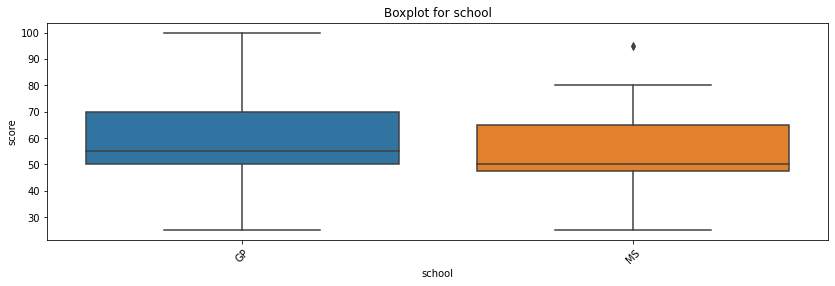

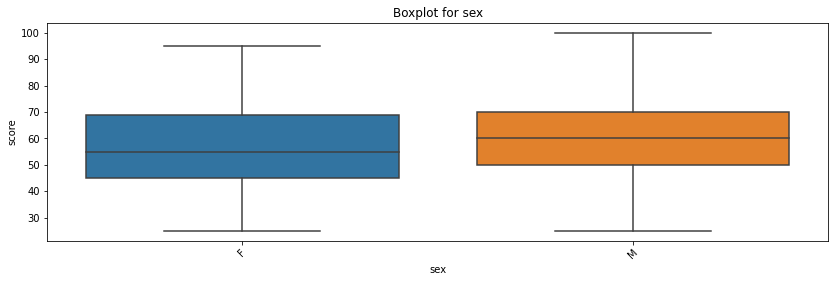

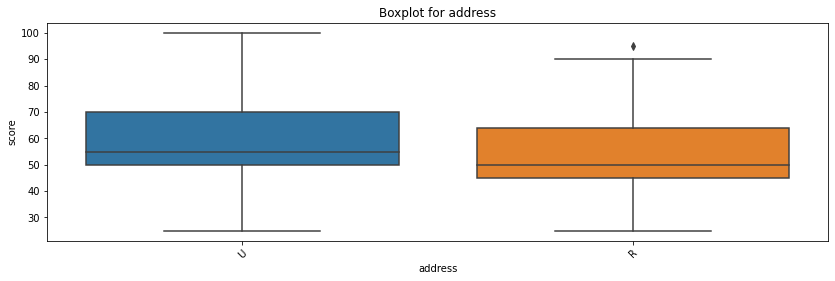

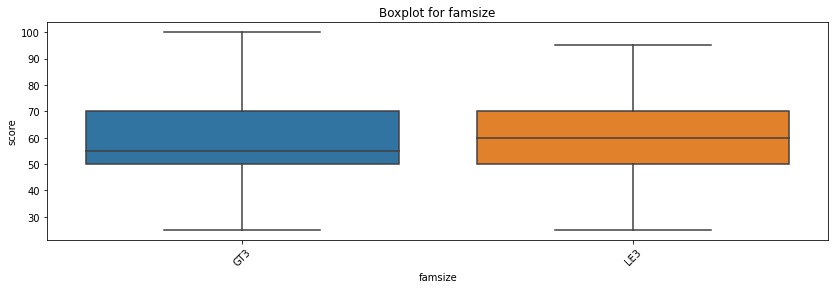

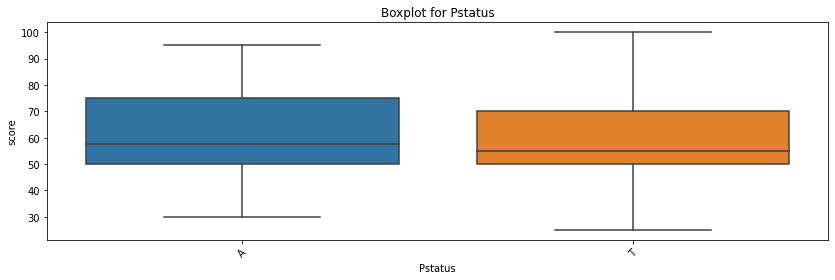

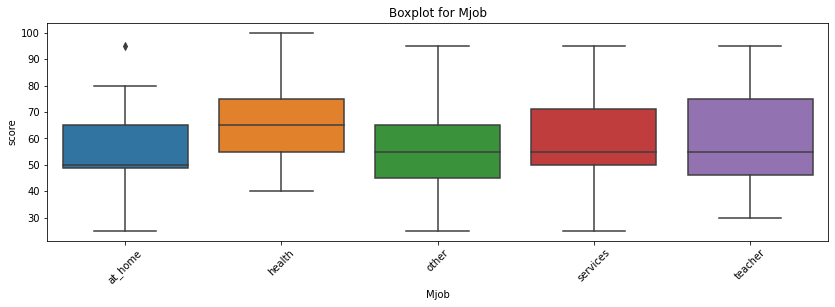

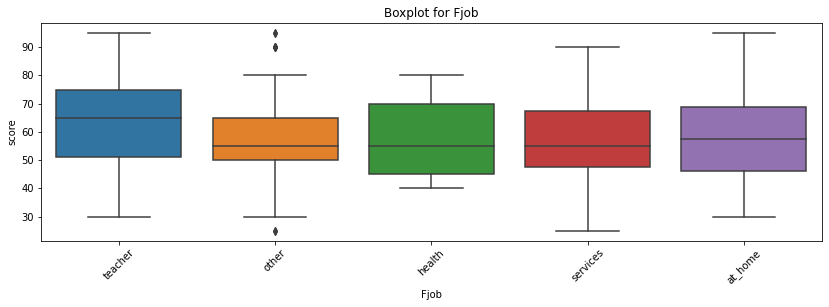

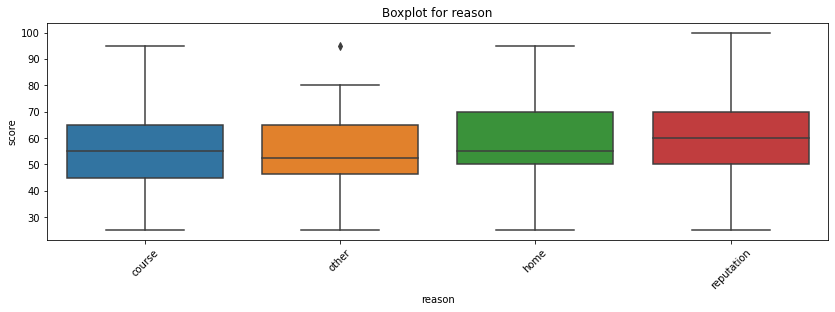

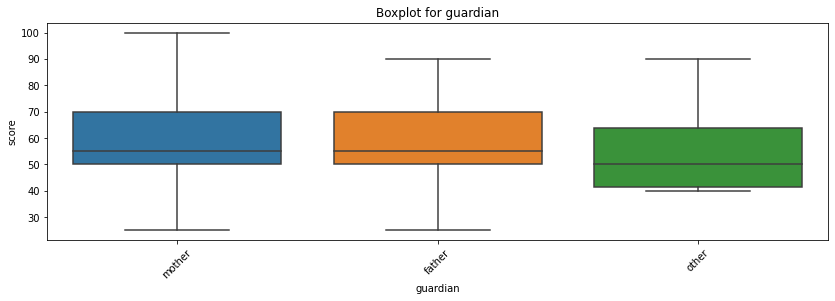

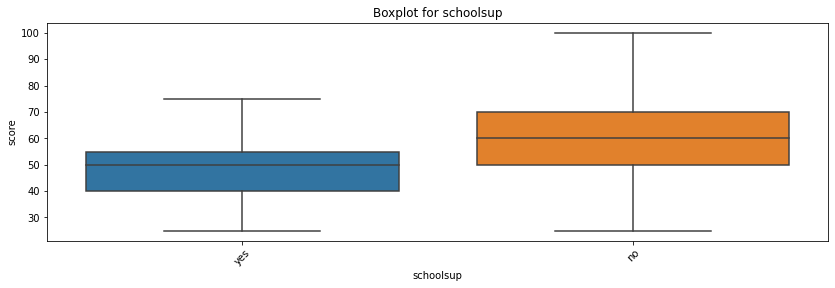

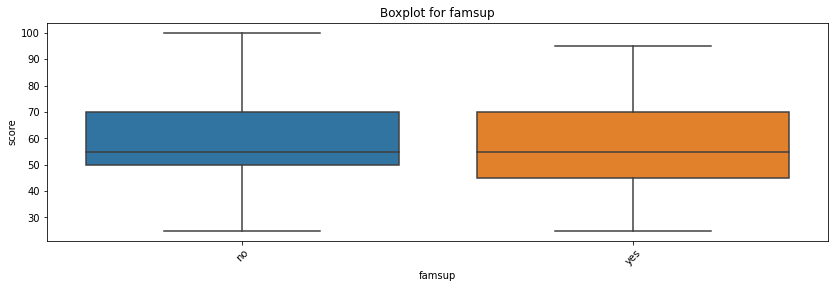

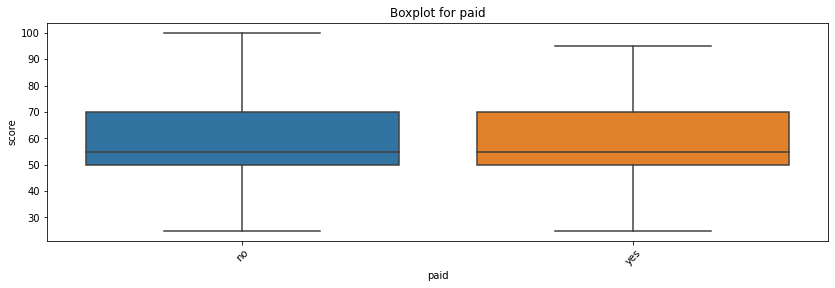

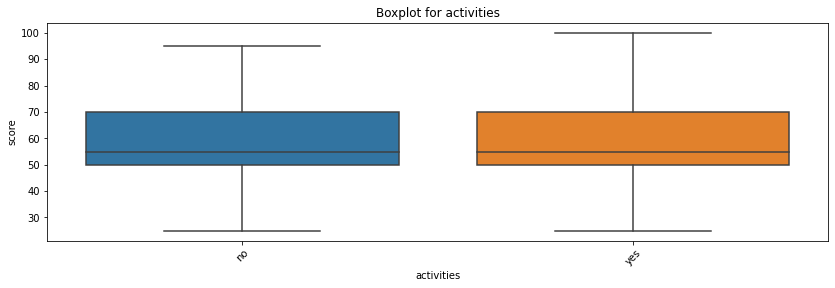

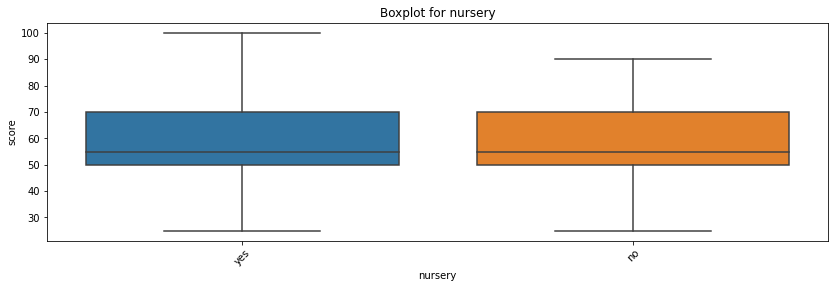

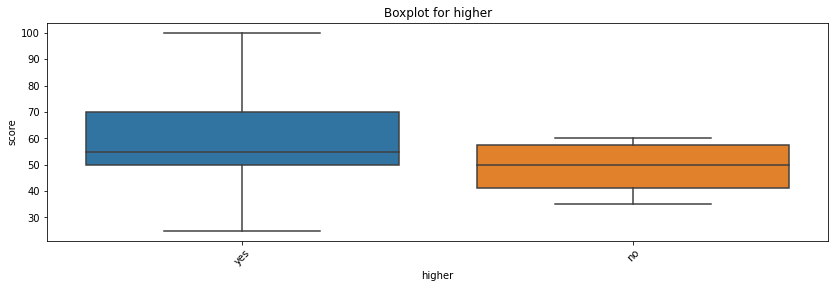

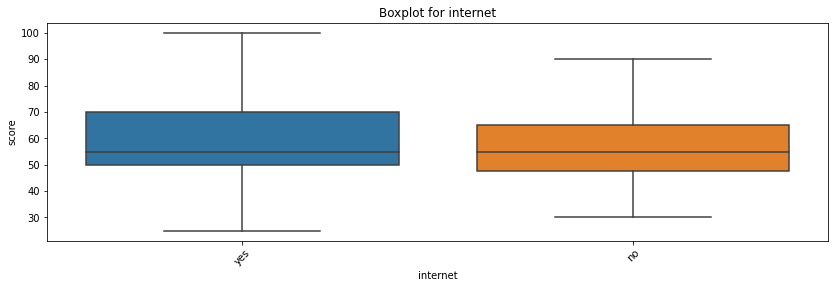

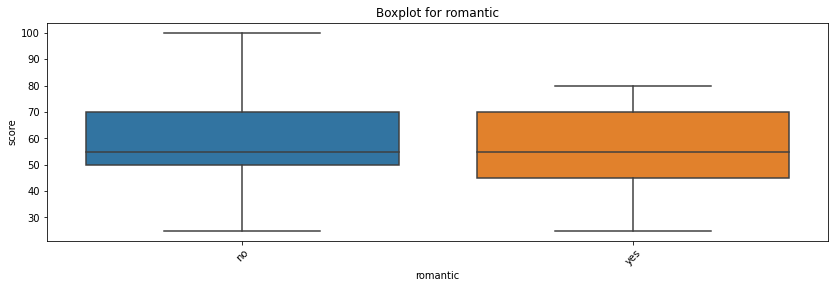

In [46]:
for i in list_stud:
    a = str(stud_math[i].dtype)
    if a=='object':
        get_boxplot(i)

# Влияние параметра будет когда некая периодичность в боксплотах, таких как higher(хочет поступать в универ), Mjob (работа матери, причем работа отца не так сильно влияет),schoolsup (доп поддержка)

### Таким образом итоговые данные которые потенциально могут влиять на оценку за экзамен:
1. higher
2. age (занижают оценку)
3. Medu
4. studytime
5. failures (занижают оценку)
6. absences (занижают оценку)
7. goout (занижают)
8. Mjob
9. schoolsup

In [47]:
stud_math_for_model = stud_math.loc[:, ['higher', 'age', 'Medu', 'studytime', 'failures','absences','goout','Mjob','schoolsup']]
stud_math_for_model.head()

,higher,age,Medu,studytime,failures,absences,goout,Mjob,schoolsup
0,yes,18,4.0,2.0,0.0,6.0,4.0,at_home,yes
1,yes,17,1.0,2.0,0.0,4.0,3.0,at_home,no
2,yes,15,1.0,2.0,3.0,10.0,2.0,at_home,yes
3,yes,15,4.0,3.0,0.0,2.0,2.0,health,no
4,yes,16,3.0,2.0,0.0,4.0,2.0,other,no
